In [1]:
import pandas as pd
import requests, json
import config.config as config

from datetime import datetime, timedelta
from requests.auth import HTTPBasicAuth

api_param = config.configuration(section = 'api')

In [3]:
password = api_param['password']
user_name = api_param['user']
url = api_param['url']
endpoint = api_param['endpoint']

def day_string_to_dt(day):
    return datetime.strptime(day, '%Y-%m-%d')

def day_plus_one(start_day):
    dt = day_string_to_dt(start_day) + timedelta(days=1)
    return dt.strftime("%Y-%m-%d")



In [4]:
df = []

def get_incidents(current_day, end_day, start_hour = 0, counter = 0, hour_interval = 8):
    print(f"Starting Interval: {counter}")
    query_string = f"opened_atBETWEENjavascript:gs.dateGenerate('{current_day}','{start_hour}:00:00')@javascript:gs.dateGenerate('{current_day}','{start_hour+hour_interval-1}:59:59')"
    payload = {'start': 0, 'count': 2000, 'encoded_query': query_string}
    json_data = requests.post(url + endpoint, data=json.dumps(payload), auth=HTTPBasicAuth(user_name, password)).json()
    df.append(pd.DataFrame(json_data['result']['records']))
    print(f"  Count of interval {counter}: {len(df[counter])}")
    if start_hour + hour_interval < 24:
        get_incidents(current_day, end_day, start_hour + hour_interval, counter + 1, hour_interval)
    elif day_string_to_dt(end_day) >= day_string_to_dt(day_plus_one(current_day)):
        get_incidents(day_plus_one(current_day), end_day, 0, counter + 1, hour_interval)

 
get_incidents(current_day = '2022-10-26', end_day = '2022-10-26')       
df = pd.concat(df, axis=0, ignore_index=True)

df['assignment_group_name'] = [x['name'] for x in df.assignment_group]


Starting Interval: 0
  Count of interval 0: 582
Starting Interval: 1
  Count of interval 1: 1254
Starting Interval: 2
  Count of interval 2: 384


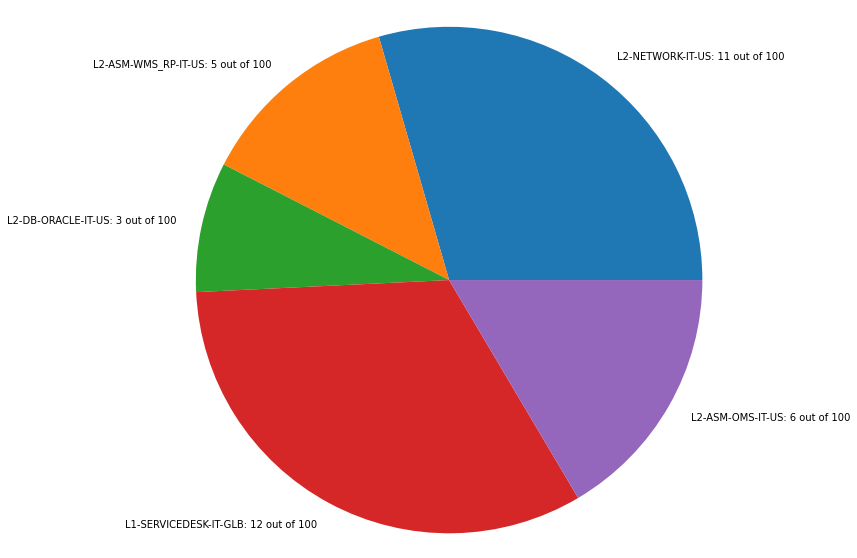

In [9]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


import numpy as np
from collections import Counter

from pyparsing import White

counts = Counter(df.assignment_group_name)
labels = []
sizes = []

for x, y in counts.items():
    if y > 70:
        labels.append(str(x) + ': ' + str(int(y/len(df) * 100)) + ' out of 100')
        sizes.append(y)
        
        
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()
